In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rc("font", family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

# 지역별 병원 분포 현황 데이터 불러오기

In [2]:
file_name = 'data1.xlsx'
df = pd.read_excel(file_name)
df.head()

,기준분기,시도,시군구,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,...,영상의학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
0,202401,서울특별시,계,9803,2626,1265,56,571,230,663,...,42,4,2,-,187,-,210,-,-,-
1,202401,서울특별시,종로구,207,62,15,-,23,3,13,...,1,-,-,-,4,-,6,-,-,-
2,202401,서울특별시,중구,285,108,32,1,16,3,18,...,2,-,-,-,7,-,4,-,-,-
3,202401,서울특별시,용산구,157,59,21,-,8,2,9,...,-,-,-,-,3,-,4,-,-,-
4,202401,서울특별시,성동구,252,54,39,2,16,4,19,...,1,-,-,-,4,-,7,-,-,-


In [3]:
# 전처리
df.drop(df.columns[0], axis=1, inplace = True) # '기준분기' 열 삭제
df.replace('-', 0, inplace = True) # 결측값 0으로 바꾸기
#df.drop(df.columns[2], axis=1, inplace = True) # '계' 행 삭제

In [4]:
df = df[df['시군구'] != '계'] # 시군구 열 중 '계'가 속해있는 행 삭제

df.head()

,시도,시군구,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,...,영상의학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
1,서울특별시,종로구,207,62,15,0,23,3,13,3,...,1,0,0,0,4,0,6,0,0,0
2,서울특별시,중구,285,108,32,1,16,3,18,4,...,2,0,0,0,7,0,4,0,0,0
3,서울특별시,용산구,157,59,21,0,8,2,9,1,...,0,0,0,0,3,0,4,0,0,0
4,서울특별시,성동구,252,54,39,2,16,4,19,4,...,1,0,0,0,4,0,7,0,0,0
5,서울특별시,광진구,295,72,47,1,22,10,21,5,...,1,0,0,0,5,0,7,0,0,0


In [5]:
df_sido=df.groupby('시도').sum() # 같은 '시도'끼리 묶기
df_sido.head()

,시군구,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,심장혈관흉부외과,...,영상의학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
시도,,,,,,,,,,,,,,,,,,,,,
강원특별자치도,춘천시원주시강릉시동해시태백시속초시삼척시홍천군횡성군영월군평창군정선군철원군화천군양구군인...,804,235,133,8,22,29,62,14,0,...,7,0,0,0,13,0,16,0,0,0
경기도,수원장안구수원권선구수원팔달구수원영통구성남수정구성남중원구성남분당구의정부시안양만안구안양...,8162,2106,1253,45,340,232,668,141,9,...,31,3,2,1,119,0,188,1,0,1
경상남도,창원의창구창원성산구창원마산합포구창원마산회원구창원진해구진주시통영시사천시김해시밀양시거제...,1709,522,289,12,58,45,104,35,2,...,5,2,0,0,12,0,33,0,1,0
경상북도,포항남구포항북구경주시김천시안동시구미시영주시영천시상주시문경시경산시의성군청송군영양군영덕...,1302,392,217,17,30,55,98,27,2,...,4,0,0,0,11,0,33,0,0,0
광주광역시,광주동구광주서구광주남구광주북구광주광산구,1054,268,176,18,45,32,51,19,0,...,3,2,0,0,20,0,46,0,0,0


In [6]:
df_sido.drop(df_sido.columns[0], axis=1, inplace = True)
df_sido

,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,심장혈관흉부외과,성형외과,...,영상의학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
시도,,,,,,,,,,,,,,,,,,,,,
강원특별자치도,804,235,133,8,22,29,62,14,0,13,...,7,0,0,0,13,0,16,0,0,0
경기도,8162,2106,1253,45,340,232,668,141,9,108,...,31,3,2,1,119,0,188,1,0,1
경상남도,1709,522,289,12,58,45,104,35,2,23,...,5,2,0,0,12,0,33,0,1,0
경상북도,1302,392,217,17,30,55,98,27,2,16,...,4,0,0,0,11,0,33,0,0,0
광주광역시,1054,268,176,18,45,32,51,19,0,31,...,3,2,0,0,20,0,46,0,0,0
대구광역시,1999,382,372,35,79,75,160,48,3,71,...,11,5,0,0,21,0,31,0,0,0
대전광역시,1119,279,188,17,69,30,78,12,5,32,...,9,2,1,0,31,0,27,0,0,0
부산광역시,2614,628,449,24,141,65,183,44,10,102,...,7,2,0,0,29,1,38,0,0,0
서울특별시,9803,2626,1265,56,571,230,663,104,12,645,...,42,4,2,0,187,0,210,0,0,0


In [7]:
df_sido.reset_index(inplace=True)
df_sido #########다시는 시프트엔터를 누르지 말 것

,시도,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,심장혈관흉부외과,...,영상의학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
0,강원특별자치도,804,235,133,8,22,29,62,14,0,...,7,0,0,0,13,0,16,0,0,0
1,경기도,8162,2106,1253,45,340,232,668,141,9,...,31,3,2,1,119,0,188,1,0,1
2,경상남도,1709,522,289,12,58,45,104,35,2,...,5,2,0,0,12,0,33,0,1,0
3,경상북도,1302,392,217,17,30,55,98,27,2,...,4,0,0,0,11,0,33,0,0,0
4,광주광역시,1054,268,176,18,45,32,51,19,0,...,3,2,0,0,20,0,46,0,0,0
5,대구광역시,1999,382,372,35,79,75,160,48,3,...,11,5,0,0,21,0,31,0,0,0
6,대전광역시,1119,279,188,17,69,30,78,12,5,...,9,2,1,0,31,0,27,0,0,0
7,부산광역시,2614,628,449,24,141,65,183,44,10,...,7,2,0,0,29,1,38,0,0,0
8,서울특별시,9803,2626,1265,56,571,230,663,104,12,...,42,4,2,0,187,0,210,0,0,0
9,세종특별자치시,230,47,34,2,14,9,18,4,0,...,1,0,0,0,3,0,5,0,0,0


In [8]:
# 지역코드 열 추가
new_column_values = [42, 41, 48, 47, 29, 27, 30, 26, 11, 36, 31, 28, 46, 45, 50, 44, 43]
df_sido.insert(0,'sido_id',new_column_values)
df_sido.head()

,sido_id,시도,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,...,영상의학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
0,42,강원특별자치도,804,235,133,8,22,29,62,14,...,7,0,0,0,13,0,16,0,0,0
1,41,경기도,8162,2106,1253,45,340,232,668,141,...,31,3,2,1,119,0,188,1,0,1
2,48,경상남도,1709,522,289,12,58,45,104,35,...,5,2,0,0,12,0,33,0,1,0
3,47,경상북도,1302,392,217,17,30,55,98,27,...,4,0,0,0,11,0,33,0,0,0
4,29,광주광역시,1054,268,176,18,45,32,51,19,...,3,2,0,0,20,0,46,0,0,0


In [9]:
df_sido = df_sido.sort_values(by = 'sido_id')
df_sido

,sido_id,시도,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,...,영상의학과,병리과,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과
8,11,서울특별시,9803,2626,1265,56,571,230,663,104,...,42,4,2,0,187,0,210,0,0,0
7,26,부산광역시,2614,628,449,24,141,65,183,44,...,7,2,0,0,29,1,38,0,0,0
5,27,대구광역시,1999,382,372,35,79,75,160,48,...,11,5,0,0,21,0,31,0,0,0
11,28,인천광역시,1781,501,281,8,60,48,155,33,...,4,1,0,0,21,0,31,0,0,0
4,29,광주광역시,1054,268,176,18,45,32,51,19,...,3,2,0,0,20,0,46,0,0,0
6,30,대전광역시,1119,279,188,17,69,30,78,12,...,9,2,1,0,31,0,27,0,0,0
10,31,울산광역시,640,186,93,4,20,15,48,11,...,3,0,0,0,7,0,18,0,0,0
9,36,세종특별자치시,230,47,34,2,14,9,18,4,...,1,0,0,0,3,0,5,0,0,0
1,41,경기도,8162,2106,1253,45,340,232,668,141,...,31,3,2,1,119,0,188,1,0,1
0,42,강원특별자치도,804,235,133,8,22,29,62,14,...,7,0,0,0,13,0,16,0,0,0


In [10]:
df_sido['sido_id'] = df_sido['sido_id'].astype(object) # 지도 시각화 위함
df_sido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 8 to 14
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sido_id   17 non-null     object
 1   시도        17 non-null     object
 2   계         17 non-null     int64 
 3   일반의       17 non-null     int64 
 4   내과        17 non-null     int64 
 5   신경과       17 non-null     int64 
 6   정신건강의학과   17 non-null     int64 
 7   외과        17 non-null     int64 
 8   정형외과      17 non-null     int64 
 9   신경외과      17 non-null     int64 
 10  심장혈관흉부외과  17 non-null     int64 
 11  성형외과      17 non-null     int64 
 12  마취통증의학과   17 non-null     int64 
 13  산부인과      17 non-null     int64 
 14  소아청소년과    17 non-null     int64 
 15  안과        17 non-null     int64 
 16  이비인후과     17 non-null     int64 
 17  피부과       17 non-null     int64 
 18  비뇨의학과     17 non-null     int64 
 19  영상의학과     17 non-null     int64 
 20  병리과       17 non-null     int64 
 21  진단검사의학과   17 non-null  

In [11]:
file_name2 = 'data2.csv'
df2 = pd.read_csv(file_name2, encoding='cp949')
df2.drop(df2.columns[[0,1,3,4]], axis=1, inplace=True)
df2

,시도명,계,남자,여자,0세남자,1세남자,2세남자,3세남자,4세남자,5세남자,...,101세여자,102세여자,103세여자,104세여자,105세여자,106세여자,107세여자,108세여자,109세여자,110세이상 여자
0,서울특별시,11240,5117,6123,21,23,15,26,29,20,...,1,0,1,0,0,0,0,0,0,0
1,서울특별시,8983,3945,5038,8,17,21,15,15,26,...,2,0,0,0,0,0,0,0,0,0
2,서울특별시,2224,1055,1169,1,3,5,3,2,3,...,1,0,0,0,0,0,0,0,0,0
3,서울특별시,9065,4270,4795,12,9,19,8,20,11,...,2,1,1,0,0,0,0,0,0,0
4,서울특별시,17279,8005,9274,30,35,46,36,52,56,...,2,2,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3608,전북특별자치도,2350,1173,1177,2,0,0,3,1,3,...,0,0,0,0,0,0,0,0,0,0
3609,전북특별자치도,2066,1028,1038,0,3,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3610,전북특별자치도,2419,1186,1233,2,3,0,3,3,3,...,2,0,0,0,0,0,0,1,0,0
3611,전북특별자치도,2465,1214,1251,1,4,1,4,1,6,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df2_sido = df2.groupby('시도명').sum() 
df2_sido.reset_index(inplace=True) #df와 동일하게 시도명 첫번째 열로 빼줌
df2_sido.rename(columns={'시도명': '시도', '계':'인구수'}, inplace=True) #df_sido 와 동일하게 시도명으로 시도로 바꿔줌
df2_sido_person= df2_sido.iloc[:, [0,1]] #시도명, 인구수 총합 따로 빼옴
df2_sido_person #시도, 인구수만 빼온 df

,시도,인구수
0,강원특별자치도,1523661
1,경기도,13648156
2,경상남도,3239224
3,경상북도,2546120
4,광주광역시,1414862
5,대구광역시,2368670
6,대전광역시,1441272
7,부산광역시,3284947
8,서울특별시,9378269
9,세종특별자치시,387726


In [13]:

merged_df = pd.merge(df_sido, df2_sido_person, on='시도', how='outer') #df_sido에 인구수 추가한 것
merged_df['인구수 대비 계'] = merged_df['계'] / merged_df['인구수'] #인구수 대비 계 열 추가
merged_df.head()


,sido_id,시도,계,일반의,내과,신경과,정신건강의학과,외과,정형외과,신경외과,...,진단검사의학과,결핵과,재활의학과,핵의학과,가정의학과,응급의학과,직업환경의학과,예방의학과,인구수,인구수 대비 계
0,11,서울특별시,9803,2626,1265,56,571,230,663,104,...,2,0,187,0,210,0,0,0,9378269,0.001045
1,26,부산광역시,2614,628,449,24,141,65,183,44,...,0,0,29,1,38,0,0,0,3284947,0.000796
2,27,대구광역시,1999,382,372,35,79,75,160,48,...,0,0,21,0,31,0,0,0,2368670,0.000844
3,28,인천광역시,1781,501,281,8,60,48,155,33,...,0,0,21,0,31,0,0,0,3008484,0.000592
4,29,광주광역시,1054,268,176,18,45,32,51,19,...,0,0,20,0,46,0,0,0,1414862,0.000745


## 서울 정형외과 수 / 전체 정형외과 수

In [14]:
case = pd.DataFrame({'ort_ratio': merged_df['정형외과']/merged_df['정형외과'].sum(),
                      'pla_ratio': merged_df['성형외과']/merged_df['성형외과'].sum(),
                      'men_ratio': merged_df['정신건강의학과']/merged_df['정신건강의학과'].sum(),
                      'gyn_ratio': merged_df['산부인과']/merged_df['산부인과'].sum(),
                      'ped_ratio': merged_df['소아청소년과']/merged_df['소아청소년과'].sum()})

case = pd.concat([merged_df[['sido_id','시도']], case], axis=1)
case[['ort_ratio','pla_ratio','men_ratio','gyn_ratio','ped_ratio']] = (case[['ort_ratio','pla_ratio','men_ratio','gyn_ratio','ped_ratio']]*100).round(2) #마지막에 열 5개 묶어서 한번에 계산
case

,sido_id,시도,ort_ratio,pla_ratio,men_ratio,gyn_ratio,ped_ratio
0,11,서울특별시,25.38,55.27,35.25,30.10,21.03
1,26,부산광역시,7.01,8.74,8.70,5.31,6.46
2,27,대구광역시,6.13,6.08,4.88,5.76,5.22
3,28,인천광역시,5.93,3.08,3.70,4.55,6.60
4,29,광주광역시,1.95,2.66,2.78,2.58,1.92
5,30,대전광역시,2.99,2.74,4.26,2.81,2.57
6,31,울산광역시,1.84,0.94,1.23,2.20,1.56
7,36,세종특별자치시,0.69,0.34,0.86,0.61,1.24
8,41,경기도,25.57,9.25,20.99,22.97,31.56
9,42,강원특별자치도,2.37,1.11,1.36,2.50,2.61


# 막대그래프 생성

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False

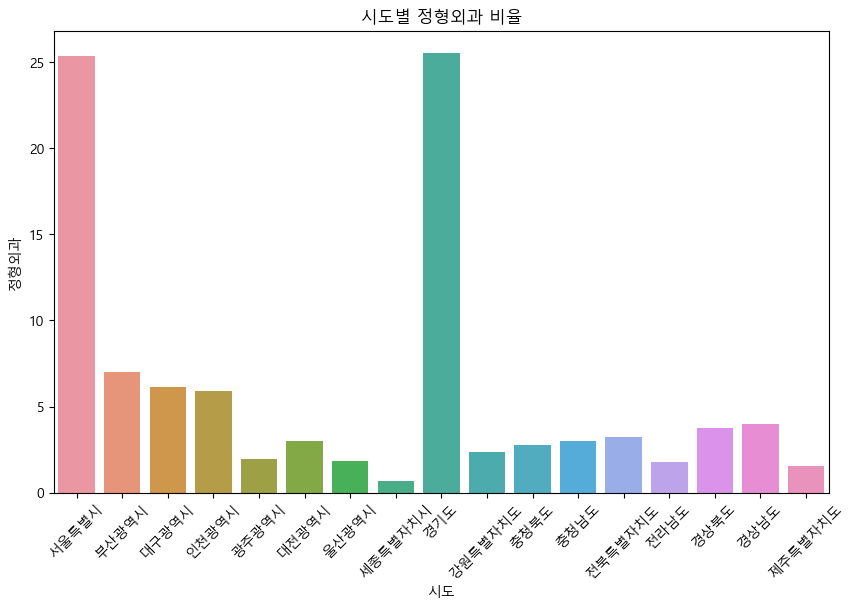

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(data=case, x='시도', y='ort_ratio')
plt.xlabel('시도')
plt.ylabel('정형외과')
plt.title('시도별 정형외과 비율')
plt.xticks(rotation=45)  # x축 레이블을 45도로 회전하여 보기 쉽게 함
plt.show()

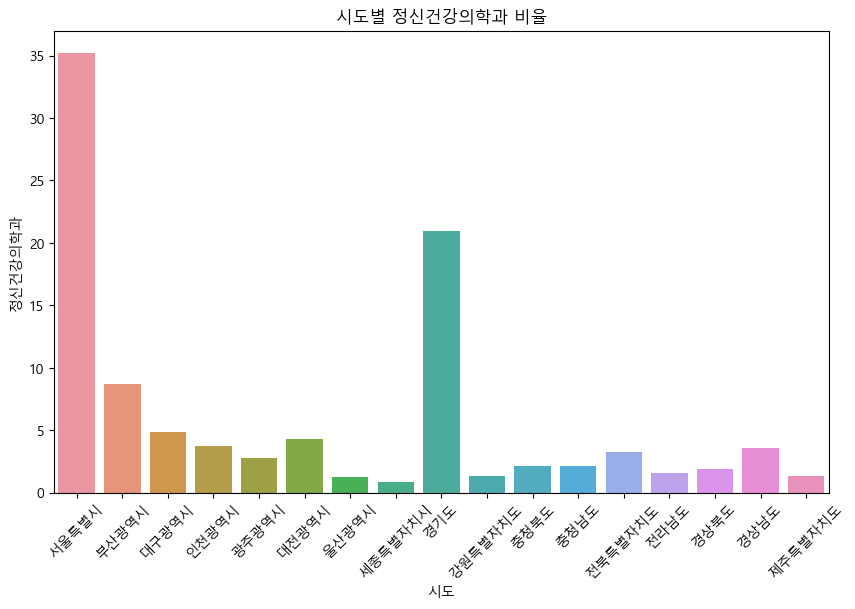

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=case, x='시도', y='men_ratio')
plt.xlabel('시도')
plt.ylabel('정신건강의학과')
plt.title('시도별 정신건강의학과 비율')
plt.xticks(rotation=45)
plt.show()

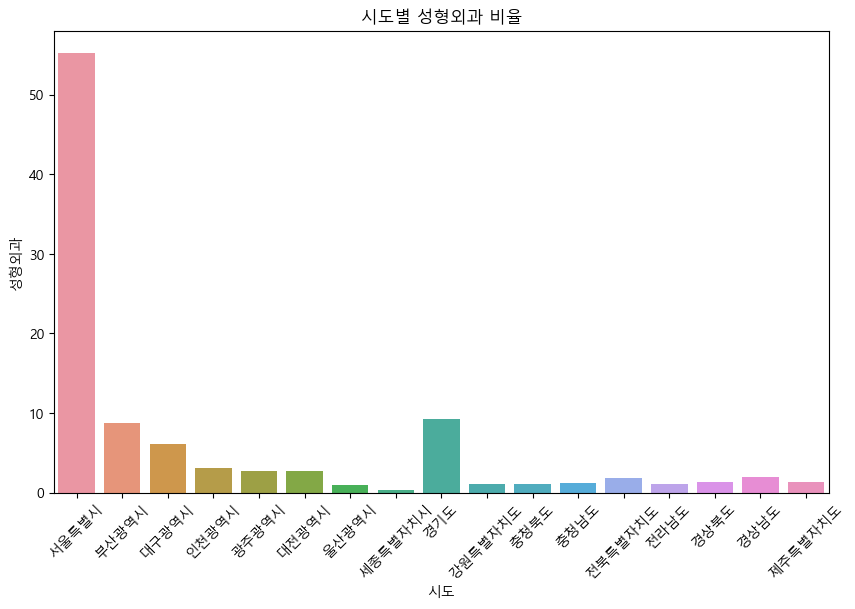

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=case, x='시도', y='pla_ratio')
plt.xlabel('시도')
plt.ylabel('성형외과')
plt.title('시도별 성형외과 비율')
plt.xticks(rotation=45)
plt.show()

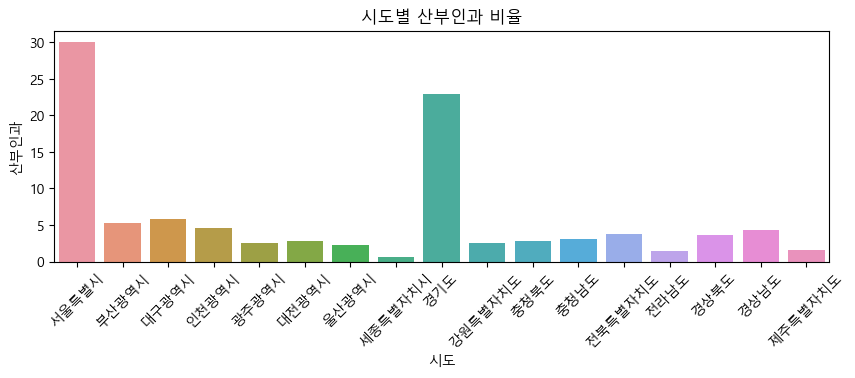

In [19]:
plt.figure(figsize=(10, 3))
sns.barplot(data=case, x='시도', y='gyn_ratio')
plt.xlabel('시도')
plt.ylabel('산부인과')
plt.title('시도별 산부인과 비율')
plt.xticks(rotation=45)
plt.show()

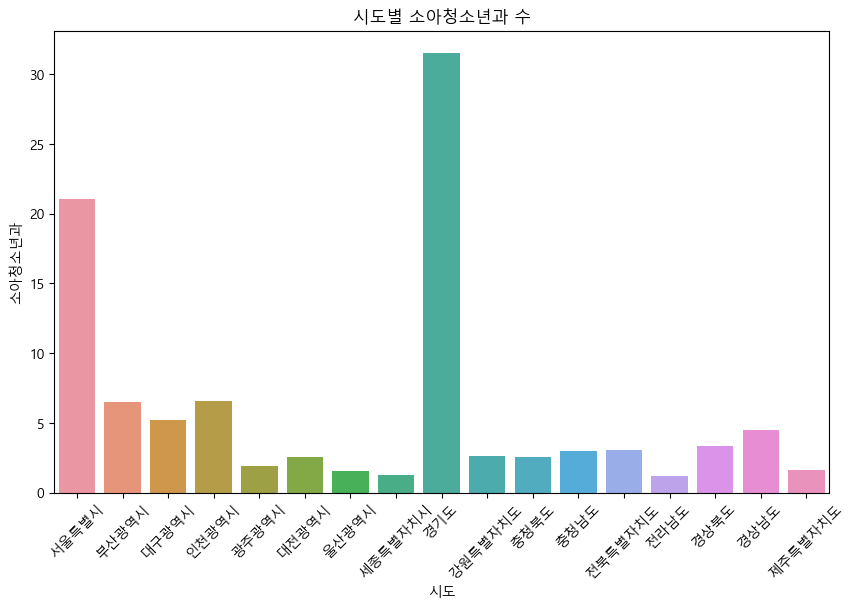

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=case, x='시도', y='ped_ratio')
plt.xlabel('시도')
plt.ylabel('소아청소년과')
plt.title('시도별 소아청소년과 수')
plt.xticks(rotation=45)
plt.show()

# 지도 시각화

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [44]:
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.family"] = 'Malgun Gothic'
korea_map = gpd.read_file(r"C:\Users\yeonl\OneDrive\바탕 화면\EDA", encoding = "cp949")
################ 멘토님 파일 경로로 수정해서 하셔야 실행이 됩니다!
korea_map

,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM,geometry
0,11,Seoul,서울특별시,"POLYGON ((966987.226 1941110.946, 961574.146 1..."
1,26,Busan,부산광역시,"MULTIPOLYGON (((1138209.365 1673609.179, 11381..."
2,27,Daegu,대구광역시,"POLYGON ((1107819.047 1781088.551, 1112278.678..."
3,28,Incheon,인천광역시,"MULTIPOLYGON (((909743.413 1946023.117, 909736..."
4,29,Gwangju,광주광역시,"POLYGON ((932712.687 1696168.692, 935873.826 1..."
5,30,Daejeon,대전광역시,"POLYGON ((990703.983 1832673.400, 990974.727 1..."
6,31,Ulsan,울산광역시,"MULTIPOLYGON (((1167949.952 1710285.043, 11679..."
7,36,Sejong-si,세종특별자치시,"POLYGON ((971235.936 1844386.985, 969224.585 1..."
8,41,Gyeonggi-do,경기도,"MULTIPOLYGON (((931607.470 1894480.382, 931653..."
9,42,Gangwon-do,강원도,"MULTIPOLYGON (((1165648.417 1909008.805, 11656..."


In [23]:
korea_map.rename(columns={"CTPRVN_CD" : "sido_id"}, inplace = True)
korea_map.drop("CTP_ENG_NM", axis=1, inplace= True)
korea_map.drop("CTP_KOR_NM", axis=1, inplace= True)
korea_map.head(2)

,sido_id,geometry
0,11,"POLYGON ((966987.226 1941110.946, 961574.146 1..."
1,26,"MULTIPOLYGON (((1138209.365 1673609.179, 11381..."


<Axes: >

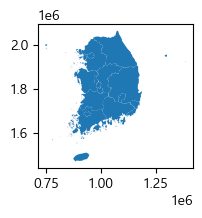

In [24]:
korea_map.plot(figsize=(2, 2))

In [25]:
korea_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sido_id   17 non-null     object  
 1   geometry  17 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 404.0+ bytes


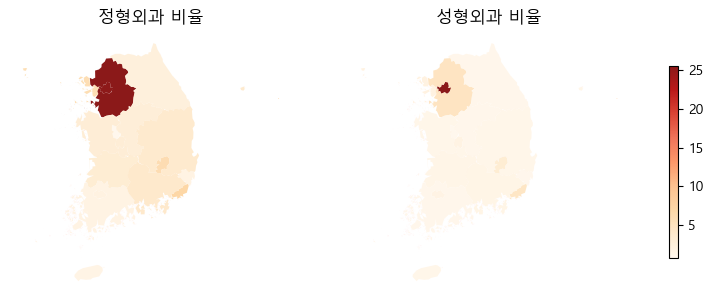

In [26]:
korea_map["정형외과"] = case['ort_ratio']
korea_map['성형외과'] = case['pla_ratio']
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
korea_map.plot(ax=ax[0], column="정형외과", cmap="OrRd", legend=False, alpha=0.9)
korea_map.plot(ax=ax[1], column="성형외과", cmap="OrRd", legend=False, alpha=0.9)

patch_col = ax[0].collections[0]

cb = fig.colorbar(patch_col, ax=ax, shrink = 0.5)

ax[0].set_title("정형외과 비율")
ax[1].set_title("성형외과 비율")
ax[0].set_axis_off()
ax[1].set_axis_off()

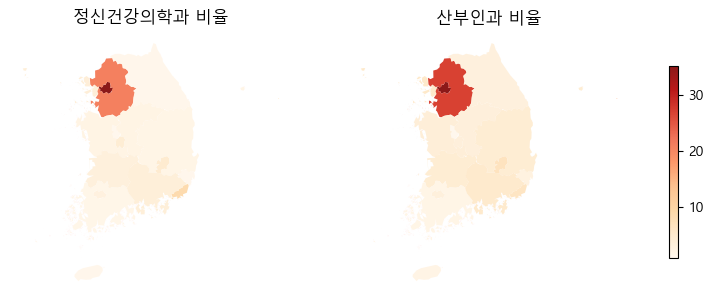

In [27]:
korea_map["정신건강의학과"] = case['men_ratio']
korea_map["산부인과"] = case['gyn_ratio']
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
korea_map.plot(ax=ax[0], column="정신건강의학과", cmap="OrRd", legend=False, alpha=0.9)
korea_map.plot(ax=ax[1], column="산부인과", cmap="OrRd", legend=False, alpha=0.9)

patch_col = ax[0].collections[0]

cb = fig.colorbar(patch_col, ax=ax, shrink = 0.5)

ax[0].set_title("정신건강의학과 비율")
ax[1].set_title("산부인과 비율")
ax[0].set_axis_off()
ax[1].set_axis_off()

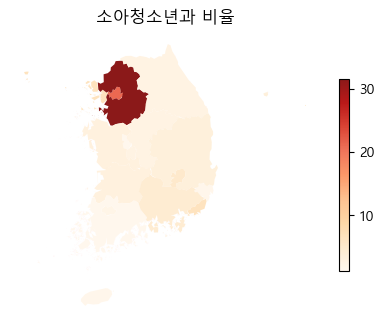

In [28]:
korea_map["소아청소년과"] = case['ped_ratio']
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(5,5))
korea_map.plot(ax=ax, column="소아청소년과", cmap="OrRd", legend=False, alpha=0.9)

patch_col = ax.collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)

ax.set_title("소아청소년과 비율")

ax.set_axis_off()

궁금증 1. 서울과 경기에 의료시설이 많이 몰리는 이유 

# 궁금증 2. 소아청소년과 비율이 타 병원과 달리 경기도 > 서울인 이유

-> 소아청소년에 해당하는 인구 (0~24세)의 비율 비교

In [42]:
df2_1 = df2.set_index('시도명')
df2_2 = df2_1.groupby('시도명').sum() 
df2_transposed = df2_2.T 
df2_soa = df2_transposed[df2_transposed.index.str.match(r'^(?:[0-9]|1[0-9]|2[0-4])세(?:남자|여자)$')]
# 0~24세 남, 0~24세 여 를 제외한 모든 행 삭제

total_sum = df2_soa.sum(axis=0) 
df2_soa.loc['계'] = total_sum # '계' 값 추가
df2_soa_sum = df2_soa.loc[['계']]
df2_soa_sum = df2_soa_sum.T 
df2_soa_sum = df2_soa_sum.sort_values(by='계') 

new_column_values2 = [36, 50, 31, 42, 30, 43, 29, 46, 45, 44, 47, 27, 26, 28, 48, 11, 41]
df2_soa_sum.insert(0,'sido_id',new_column_values2)

df2_soa_sum = df2_soa_sum.sort_values(by = 'sido_id') # 지역코드 오름차순
df2_soa_sum = df2_soa_sum.reset_index()

df2_soa_sum

C:\Users\yeonl\AppData\Local\Temp\ipykernel_17208\1543917078.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_soa.loc['계'] = total_sum # '계' 값 추가


,시도명,sido_id,계
0,서울특별시,11,1784954
1,부산광역시,26,623254
2,대구광역시,27,490701
3,인천광역시,28,629679
4,광주광역시,29,332152
5,대전광역시,30,322300
6,울산광역시,31,239550
7,세종특별자치시,36,111468
8,경기도,41,3029579
9,강원특별자치도,42,294614


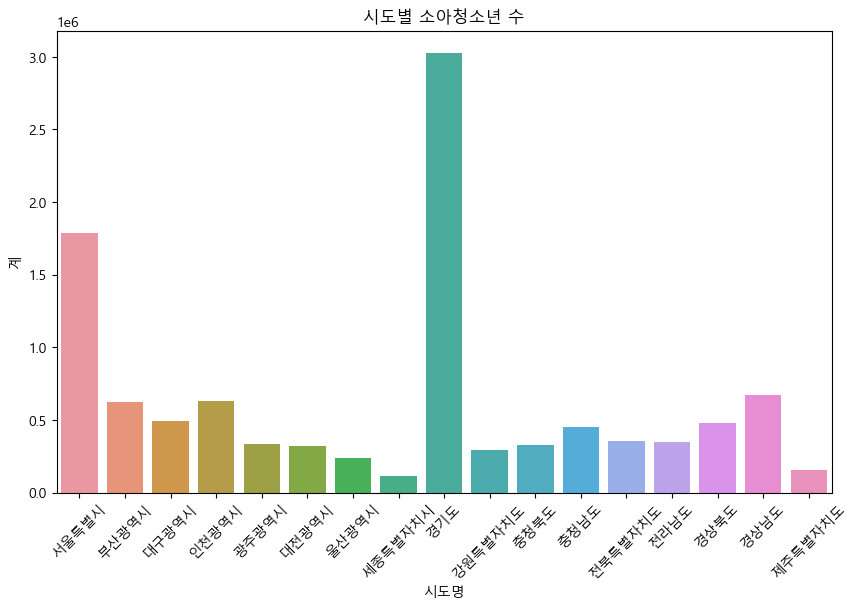

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df2_soa_sum, x='시도명', y='계')
plt.xlabel('시도명')
plt.ylabel('계')
plt.title('시도별 소아청소년 수')
plt.xticks(rotation=45)
plt.show()

-> 경기도에 소아청소년의 비율이 더 높아서였던 것으로 추측 가능

## 지역내 특정 과 / 지역내 전체 과 총합

In [31]:
case2 = pd.DataFrame({'ort_ratio': merged_df['정형외과']/merged_df['계'],
                      'pla_ratio': merged_df['성형외과']/merged_df['계'],
                      'men_ratio': merged_df['정신건강의학과']/merged_df['계'],
                      'gyn_ratio': merged_df['산부인과']/merged_df['계'],
                      'ped_ratio': merged_df['소아청소년과']/merged_df['계']})

case2 = pd.concat([merged_df[['sido_id','시도']], case2], axis=1)
case2[['ort_ratio','pla_ratio','men_ratio','gyn_ratio','ped_ratio']] = (case2[['ort_ratio','pla_ratio','men_ratio','gyn_ratio','ped_ratio']]*100).round(2) #마지막에 열 5개 묶어서 한번에 계산
case2

,sido_id,시도,ort_ratio,pla_ratio,men_ratio,gyn_ratio,ped_ratio
0,11,서울특별시,6.76,6.58,5.82,4.05,4.68
1,26,부산광역시,7.00,3.90,5.39,2.68,5.39
2,27,대구광역시,8.00,3.55,3.95,3.80,5.70
3,28,인천광역시,8.70,2.02,3.37,3.37,8.09
4,29,광주광역시,4.84,2.94,4.27,3.23,3.98
5,30,대전광역시,6.97,2.86,6.17,3.31,5.00
6,31,울산광역시,7.50,1.72,3.12,4.53,5.31
7,36,세종특별자치시,7.83,1.74,6.09,3.48,11.74
8,41,경기도,8.18,1.32,4.17,3.71,8.44
9,42,강원특별자치도,7.71,1.62,2.74,4.10,7.09


# 막대그래프

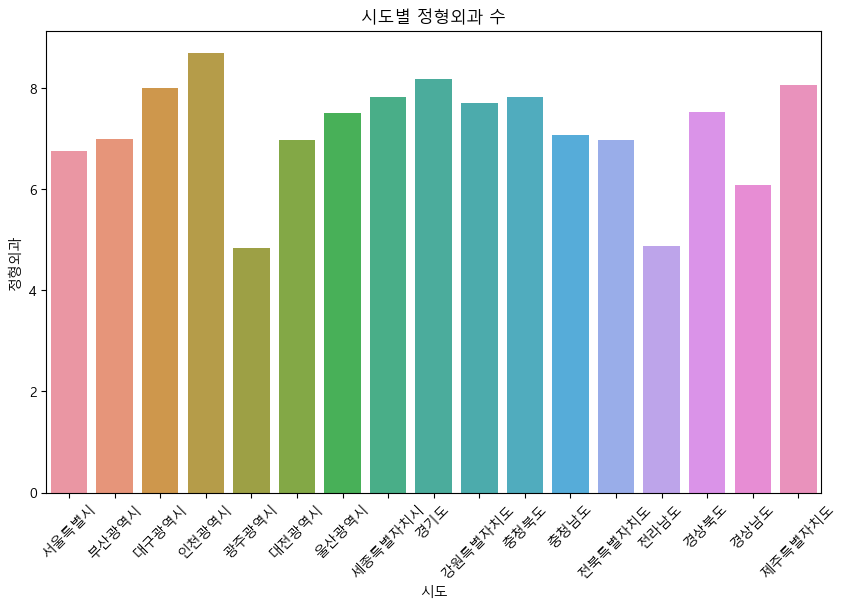

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=case2, x='시도', y='ort_ratio')
plt.xlabel('시도')
plt.ylabel('정형외과')
plt.title('시도별 정형외과 수')
plt.xticks(rotation=45)
plt.show()

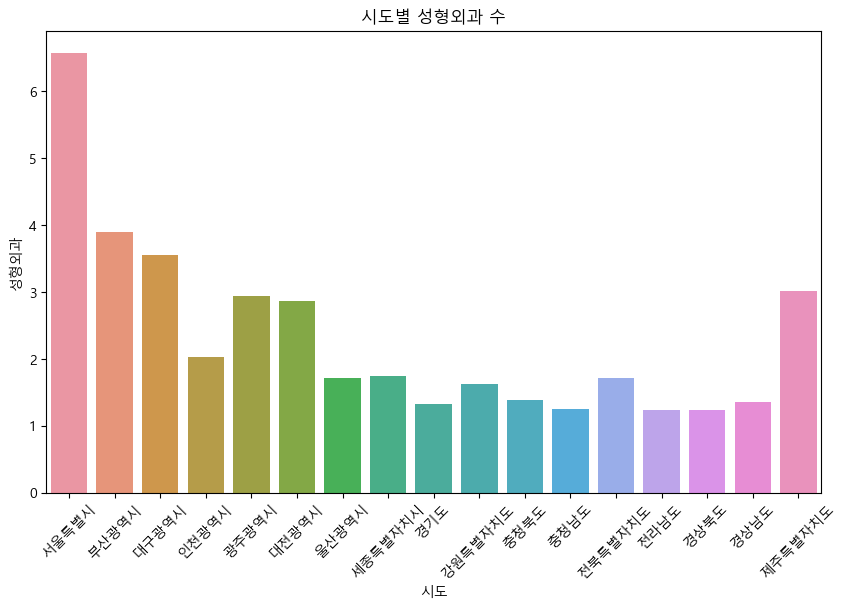

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=case2, x='시도', y='pla_ratio')
plt.xlabel('시도')
plt.ylabel('성형외과')
plt.title('시도별 성형외과 수')
plt.xticks(rotation=45)
plt.show()

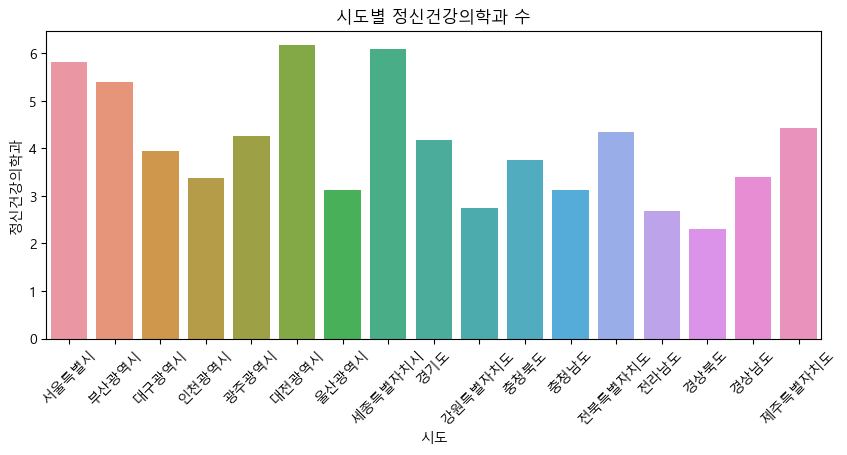

In [34]:
plt.figure(figsize=(10, 4))
sns.barplot(data=case2, x='시도', y='men_ratio')
plt.xlabel('시도')
plt.ylabel('정신건강의학과')
plt.title('시도별 정신건강의학과 수')
plt.xticks(rotation=45)
plt.show()

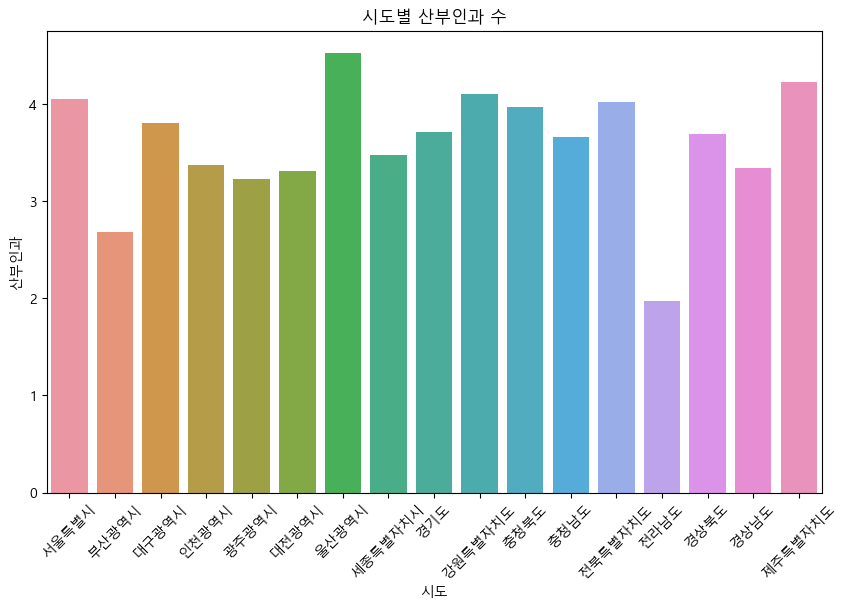

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=case2, x='시도', y='gyn_ratio')
plt.xlabel('시도')
plt.ylabel('산부인과')
plt.title('시도별 산부인과 수')
plt.xticks(rotation=45)
plt.show()

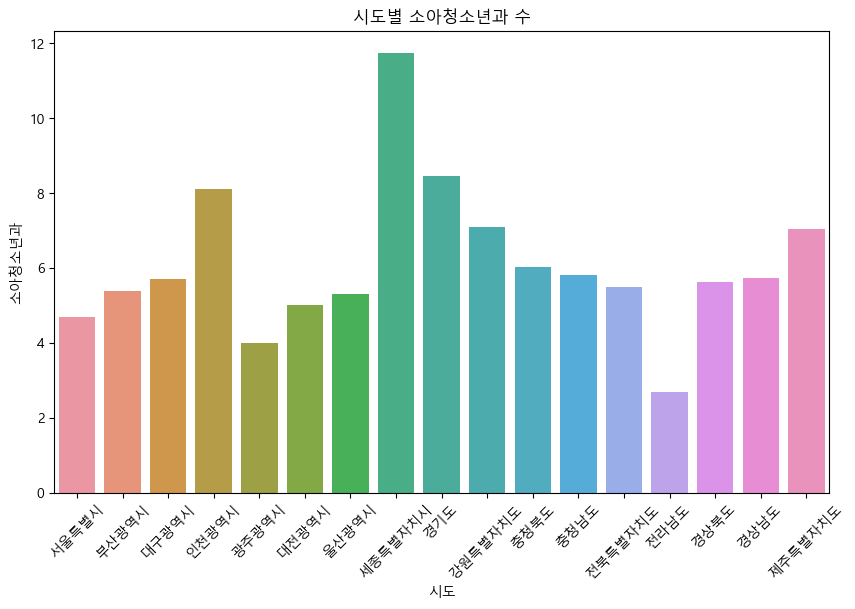

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=case2, x='시도', y='ped_ratio')
plt.xlabel('시도')
plt.ylabel('소아청소년과')
plt.title('시도별 소아청소년과 수')
plt.xticks(rotation=45)
plt.show()

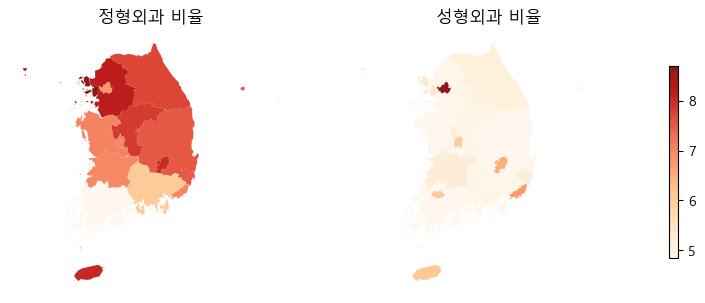

In [37]:
korea_map["정형외과"] = case2['ort_ratio']
korea_map['성형외과'] = case2['pla_ratio']
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
korea_map.plot(ax=ax[0], column="정형외과", cmap="OrRd", legend=False, alpha=0.9)
korea_map.plot(ax=ax[1], column="성형외과", cmap="OrRd", legend=False, alpha=0.9)

patch_col = ax[0].collections[0]

cb = fig.colorbar(patch_col, ax=ax, shrink = 0.5)

ax[0].set_title("정형외과 비율")
ax[1].set_title("성형외과 비율")
ax[0].set_axis_off()
ax[1].set_axis_off()

성형외과의 대부분이 서울에 있음에도 불구하고 서울내 성형외과/서울내 전체 벙원수 비율도 타 지역에 비해 높은 것을 확인 가능

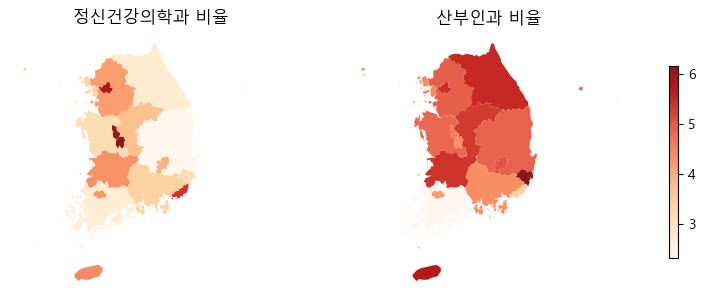

In [38]:
korea_map["정신건강의학과"] = case2['men_ratio']
korea_map["산부인과"] = case2['gyn_ratio']
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
korea_map.plot(ax=ax[0], column="정신건강의학과", cmap="OrRd", legend=False, alpha=0.9)
korea_map.plot(ax=ax[1], column="산부인과", cmap="OrRd", legend=False, alpha=0.9)

patch_col = ax[0].collections[0]

cb = fig.colorbar(patch_col, ax=ax, shrink = 0.5)

ax[0].set_title("정신건강의학과 비율")
ax[1].set_title("산부인과 비율")
ax[0].set_axis_off()
ax[1].set_axis_off()

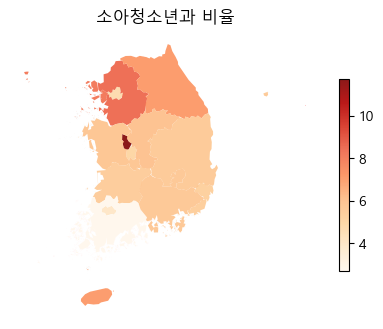

In [39]:
korea_map["소아청소년과"] = case2['ped_ratio']
fig, ax = plt.subplots(ncols=1, sharey=True, figsize=(5,5))
korea_map.plot(ax=ax, column="소아청소년과", cmap="OrRd", legend=False, alpha=0.9)

patch_col = ax.collections[0]
cb = fig.colorbar(patch_col, ax=ax, shrink=0.5)

ax.set_title("소아청소년과 비율")

ax.set_axis_off()

# 파이차트 시각화

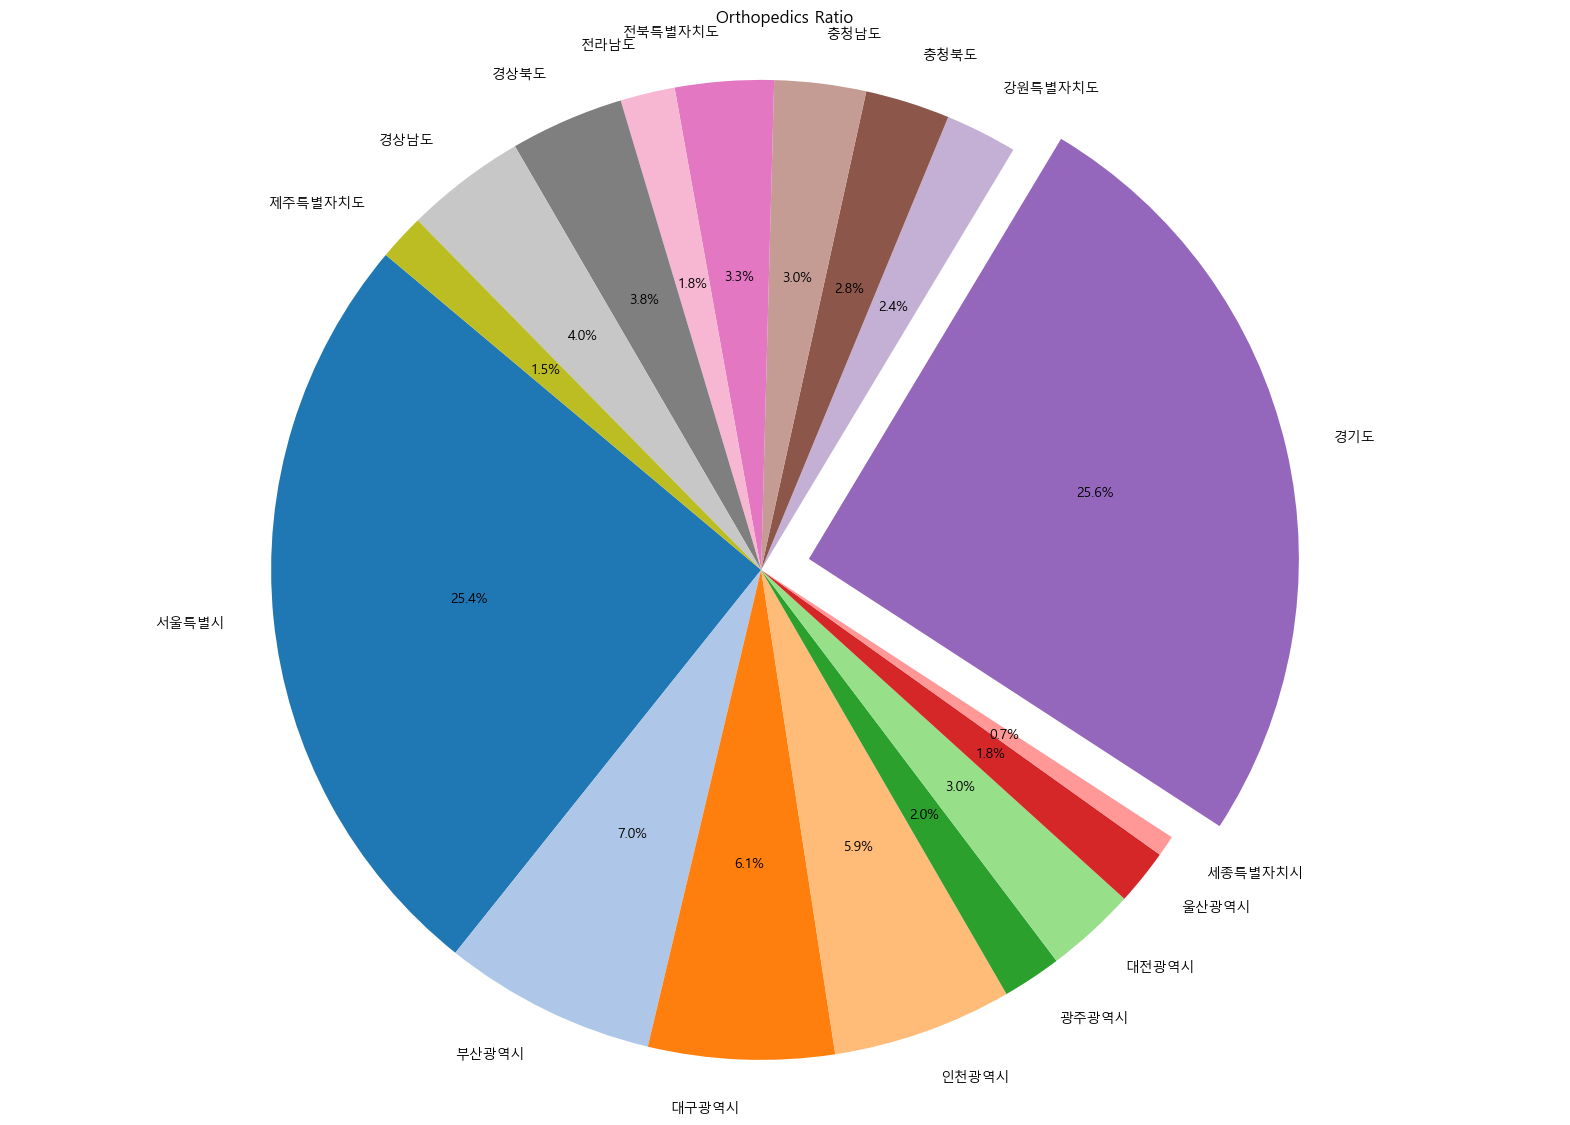

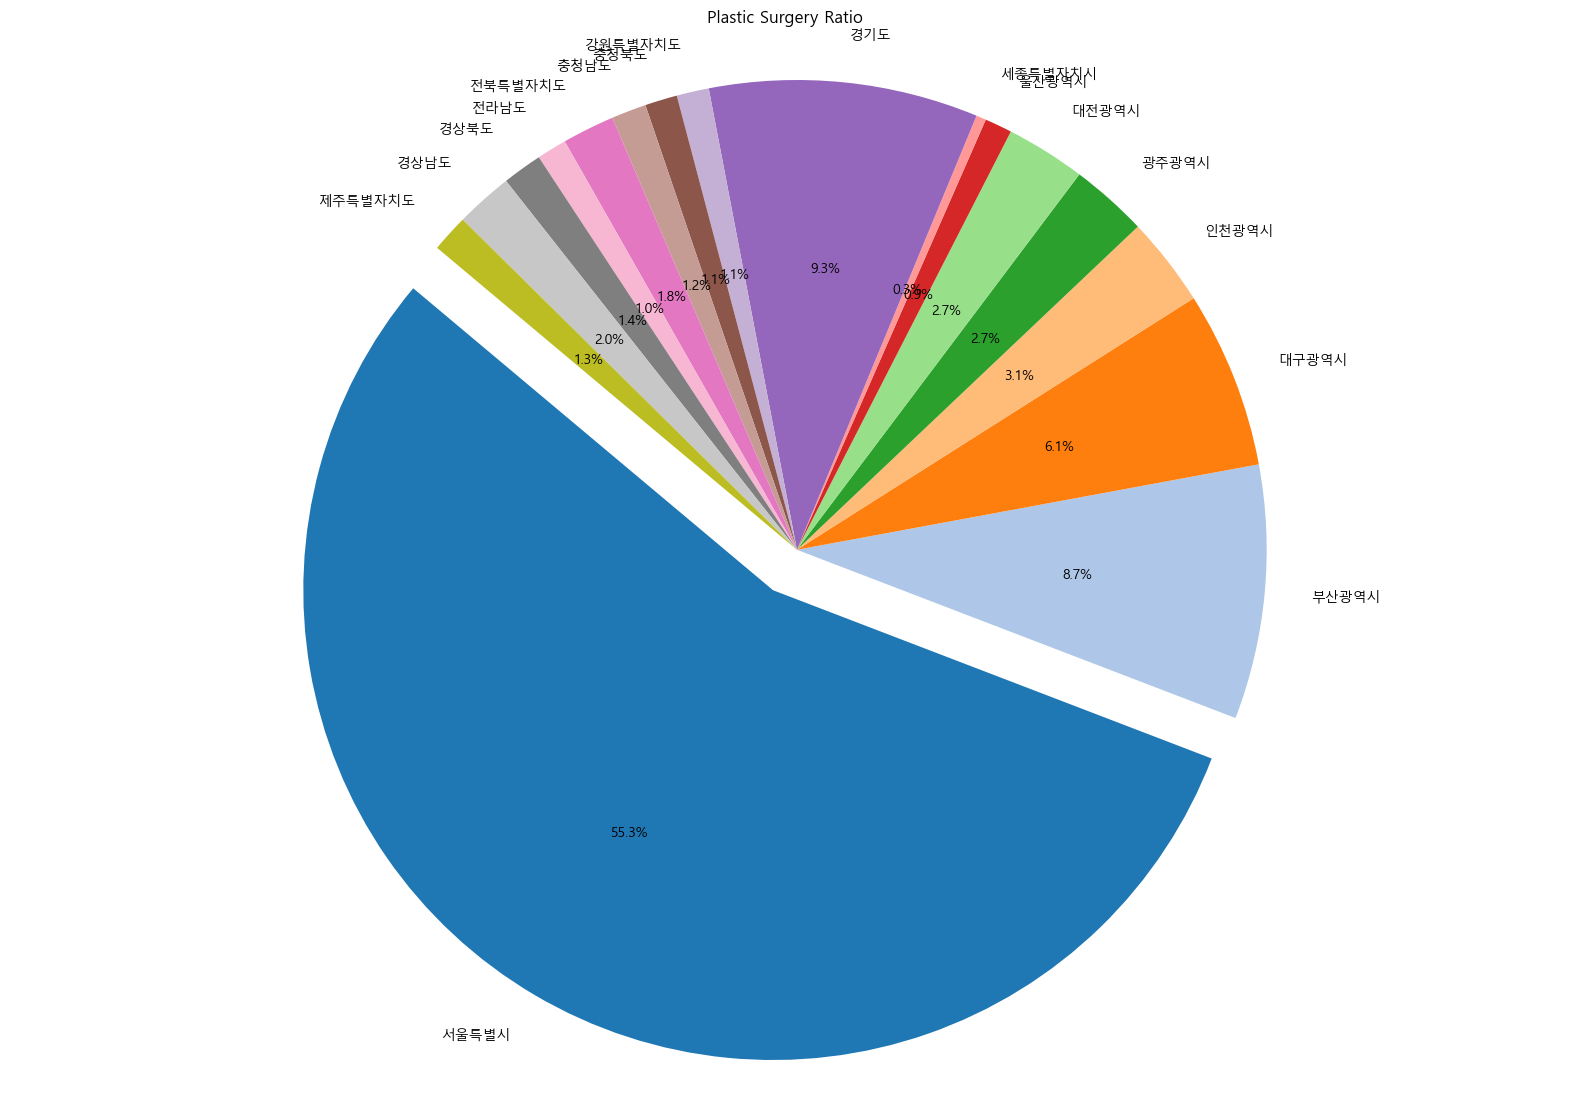

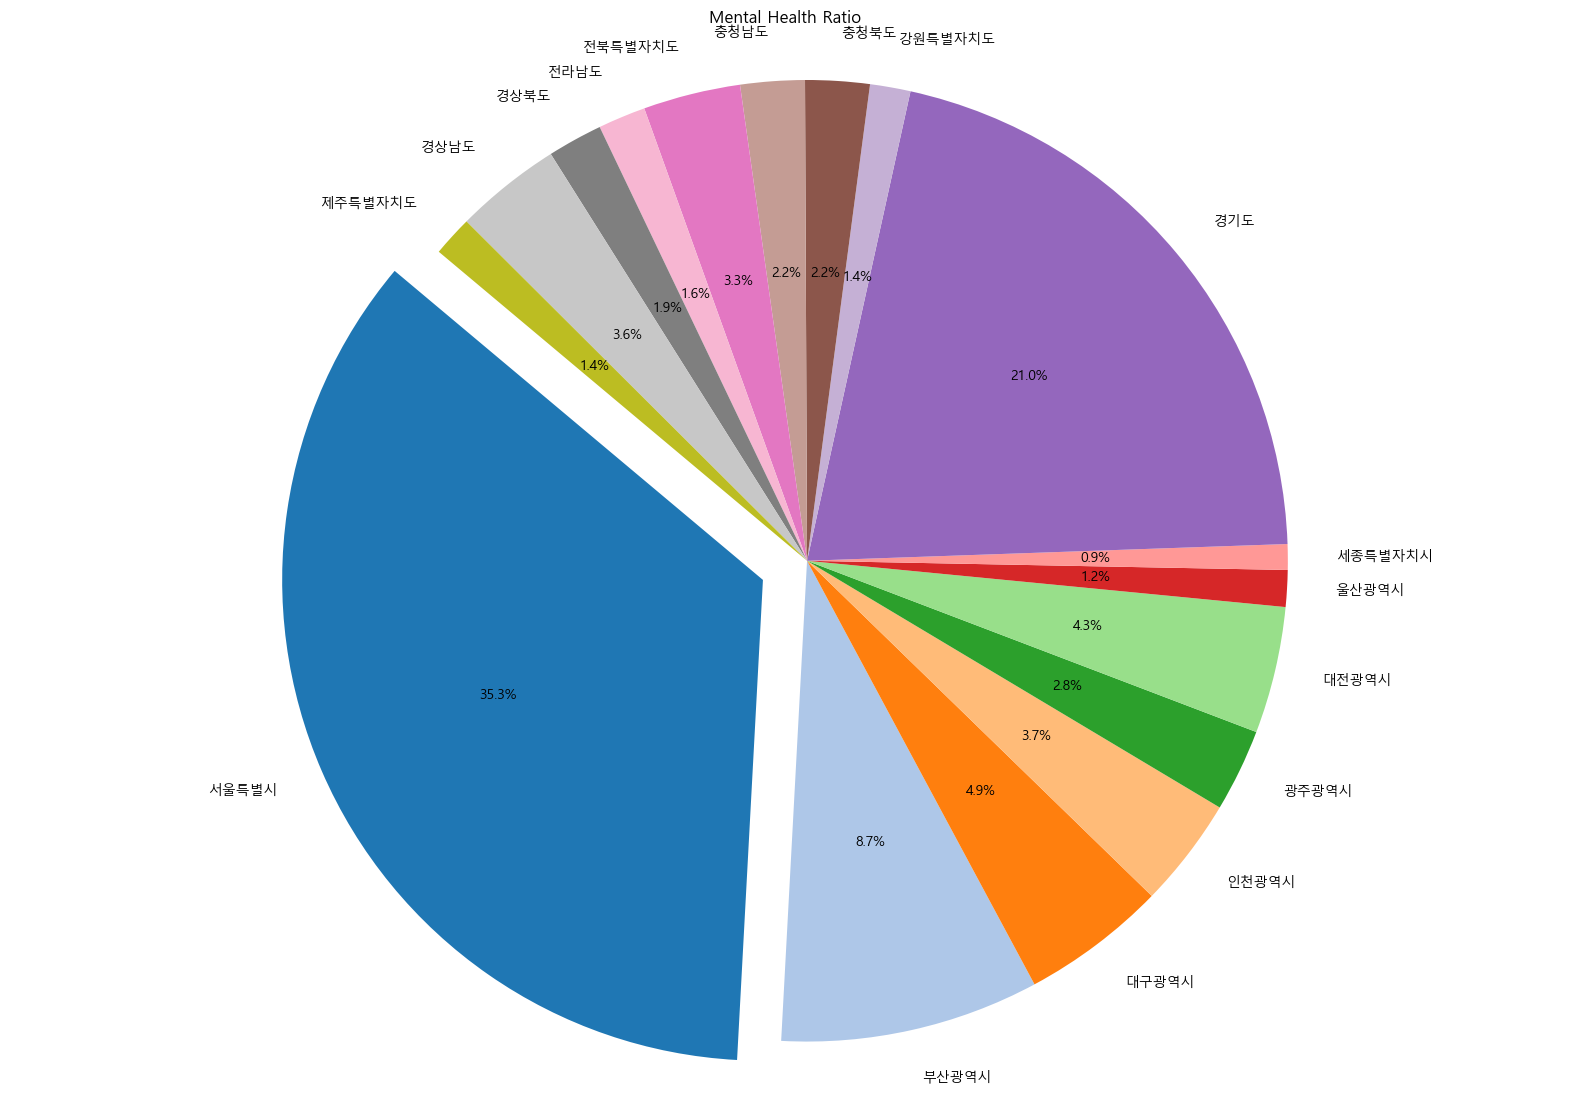

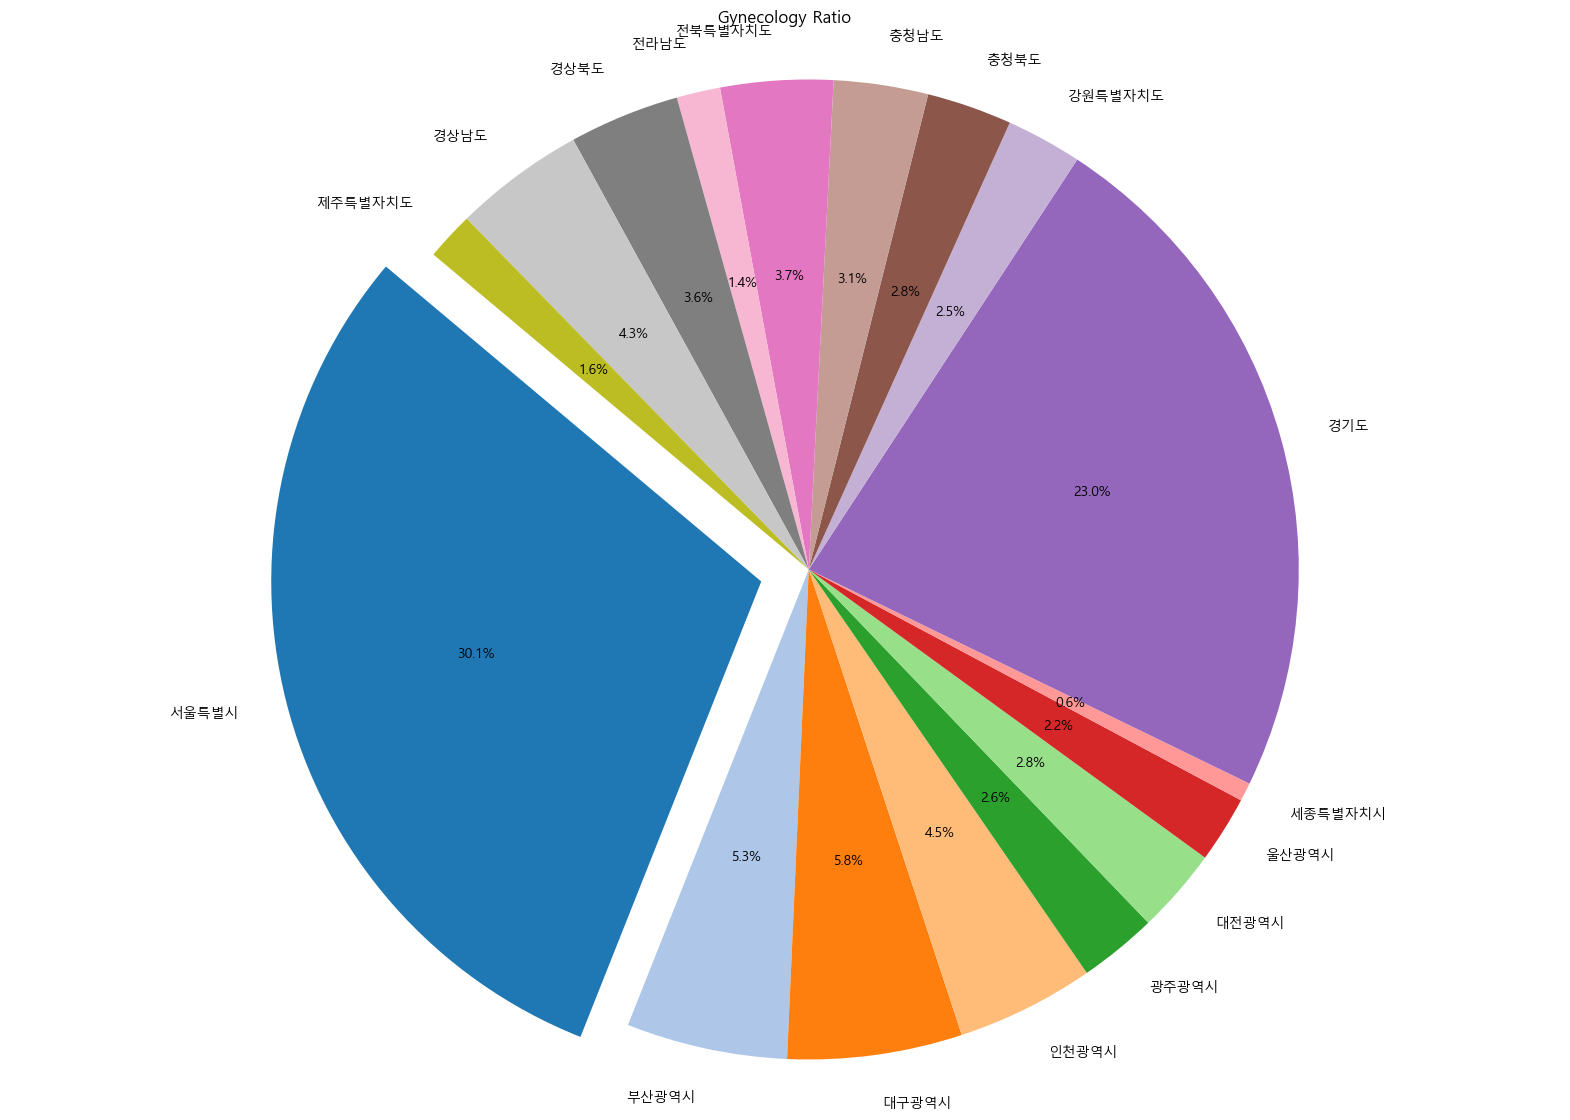

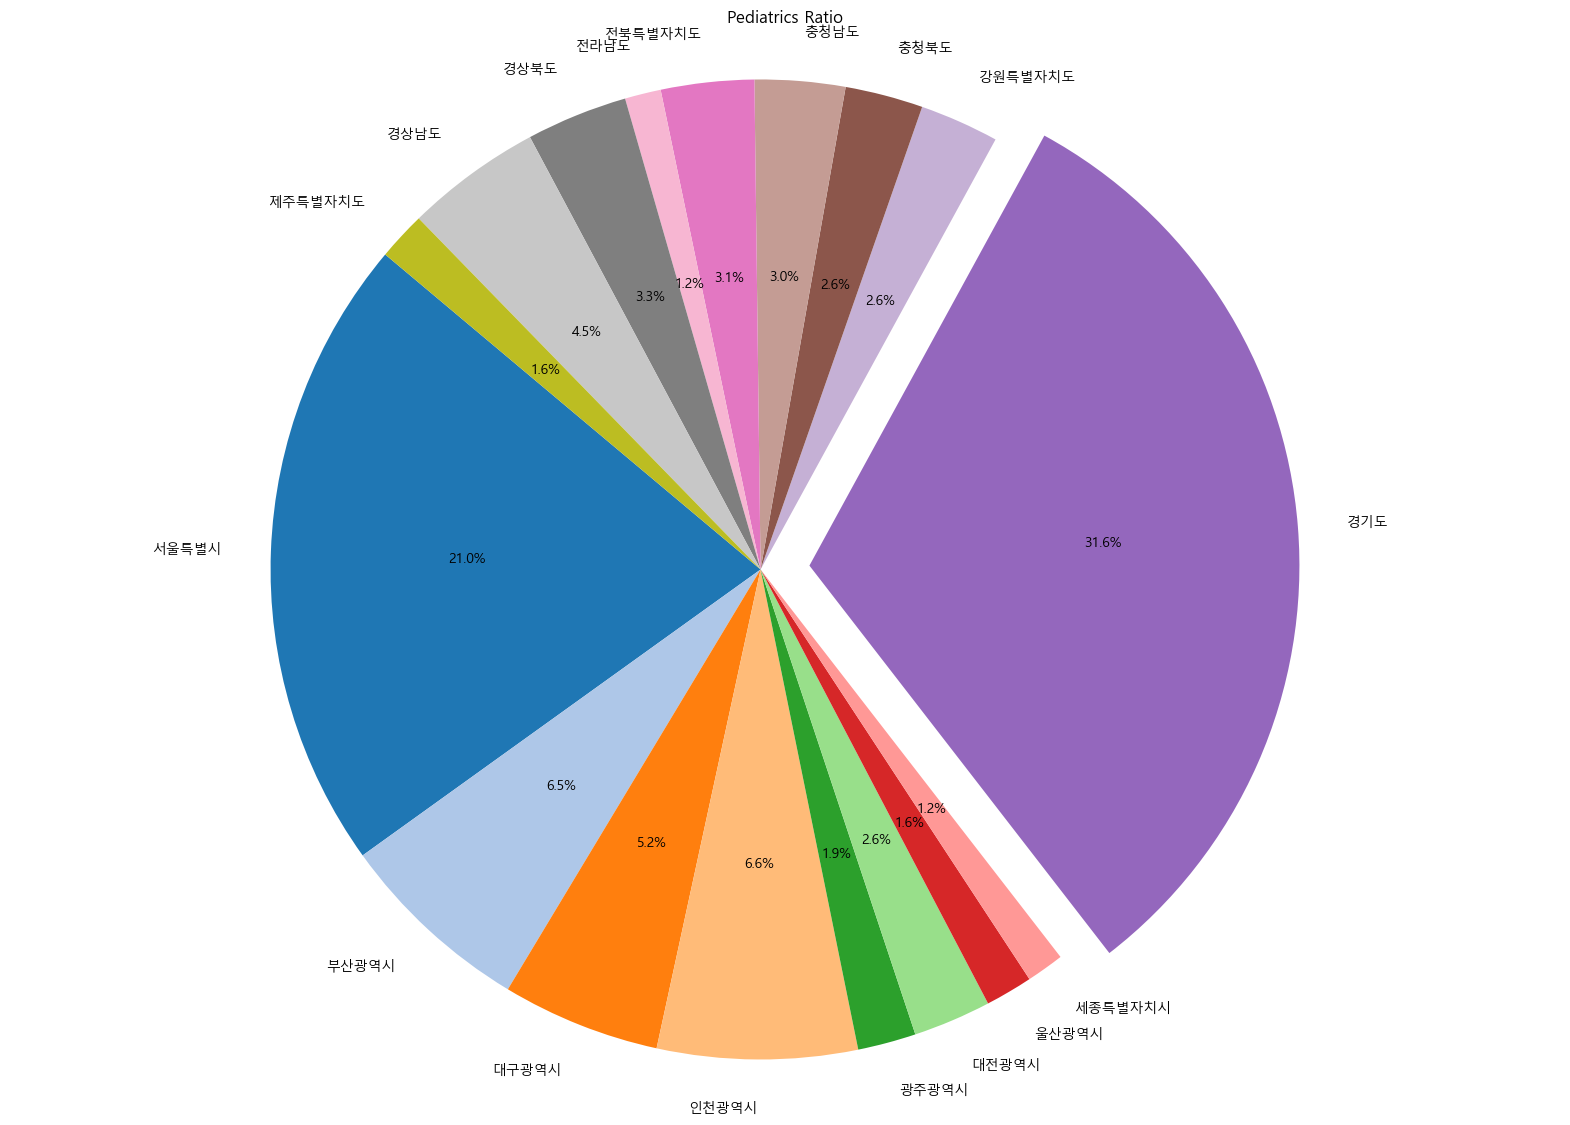

In [40]:
def plot_pie_chart(column, title):
    labels = case['시도']
    sizes = case[column]
    colors = plt.cm.tab20(range(len(labels)))
    explode = [0.1 if size == max(sizes) else 0 for size in sizes]  # 최대값 강조
    
    
    plt.figure(figsize=(20, 14))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

ratios = ['ort_ratio', 'pla_ratio', 'men_ratio', 'gyn_ratio', 'ped_ratio']
titles = ['Orthopedics Ratio', 'Plastic Surgery Ratio', 'Mental Health Ratio', 'Gynecology Ratio', 'Pediatrics Ratio']
for ratio, title in zip(ratios, titles):
    plot_pie_chart(ratio, title)

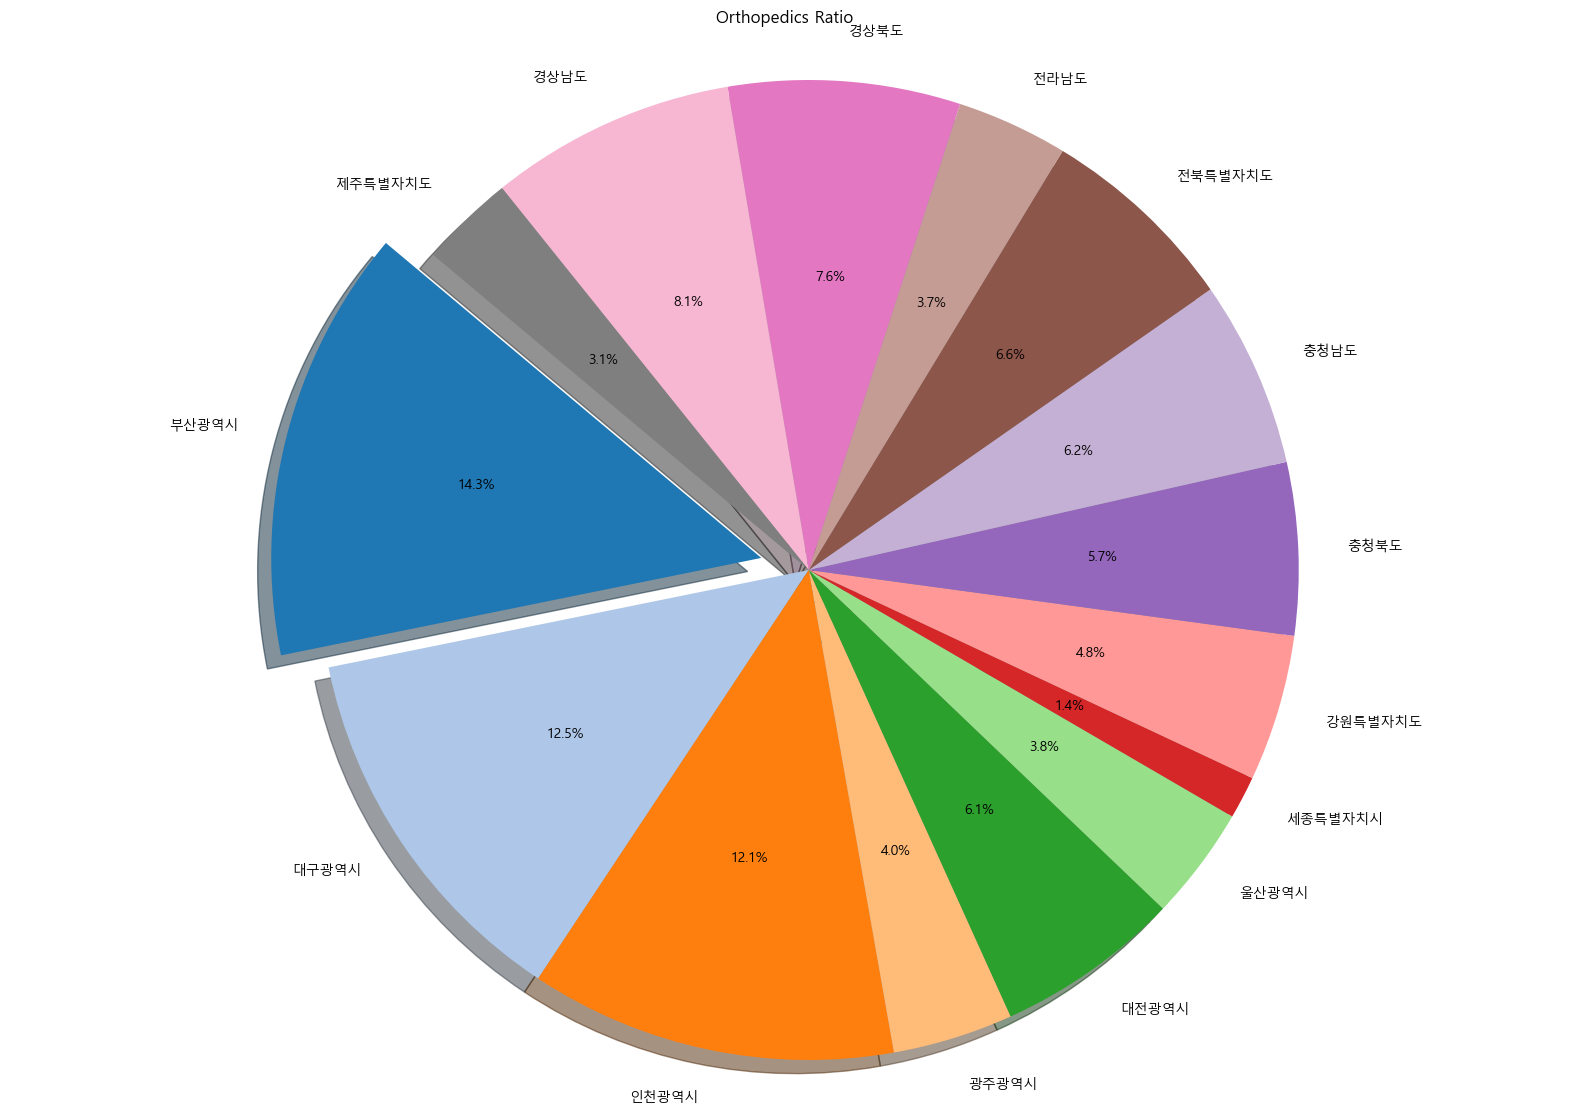

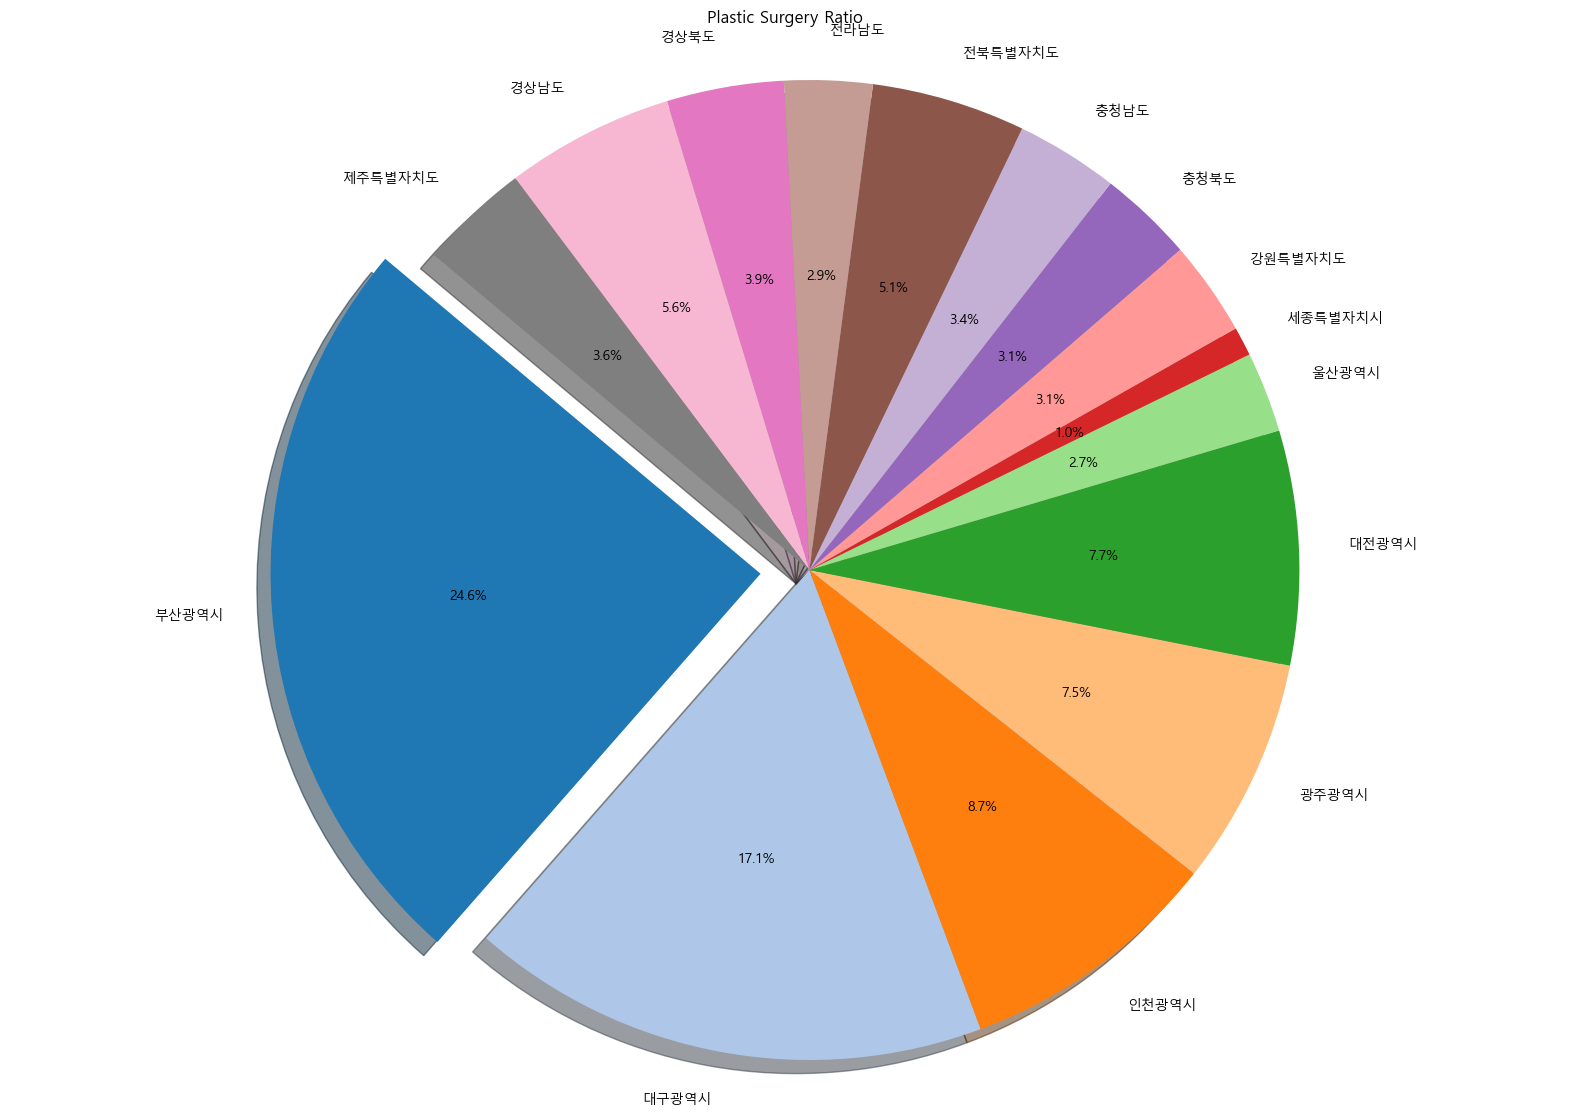

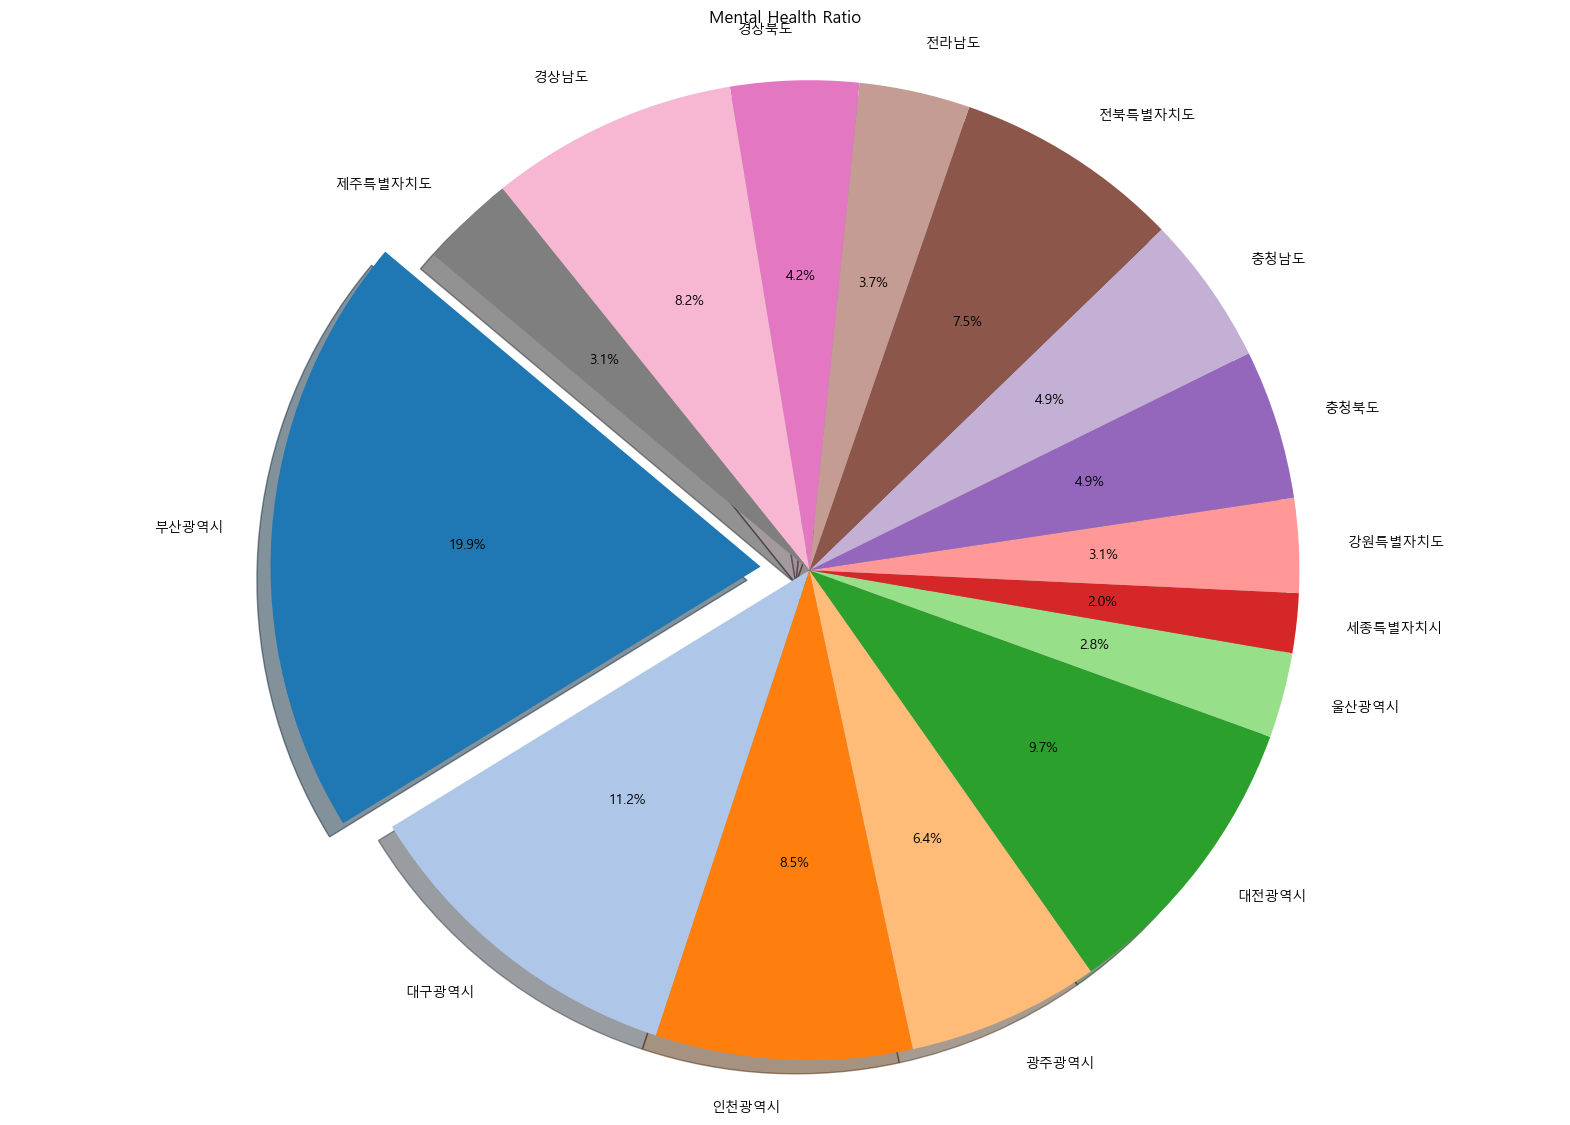

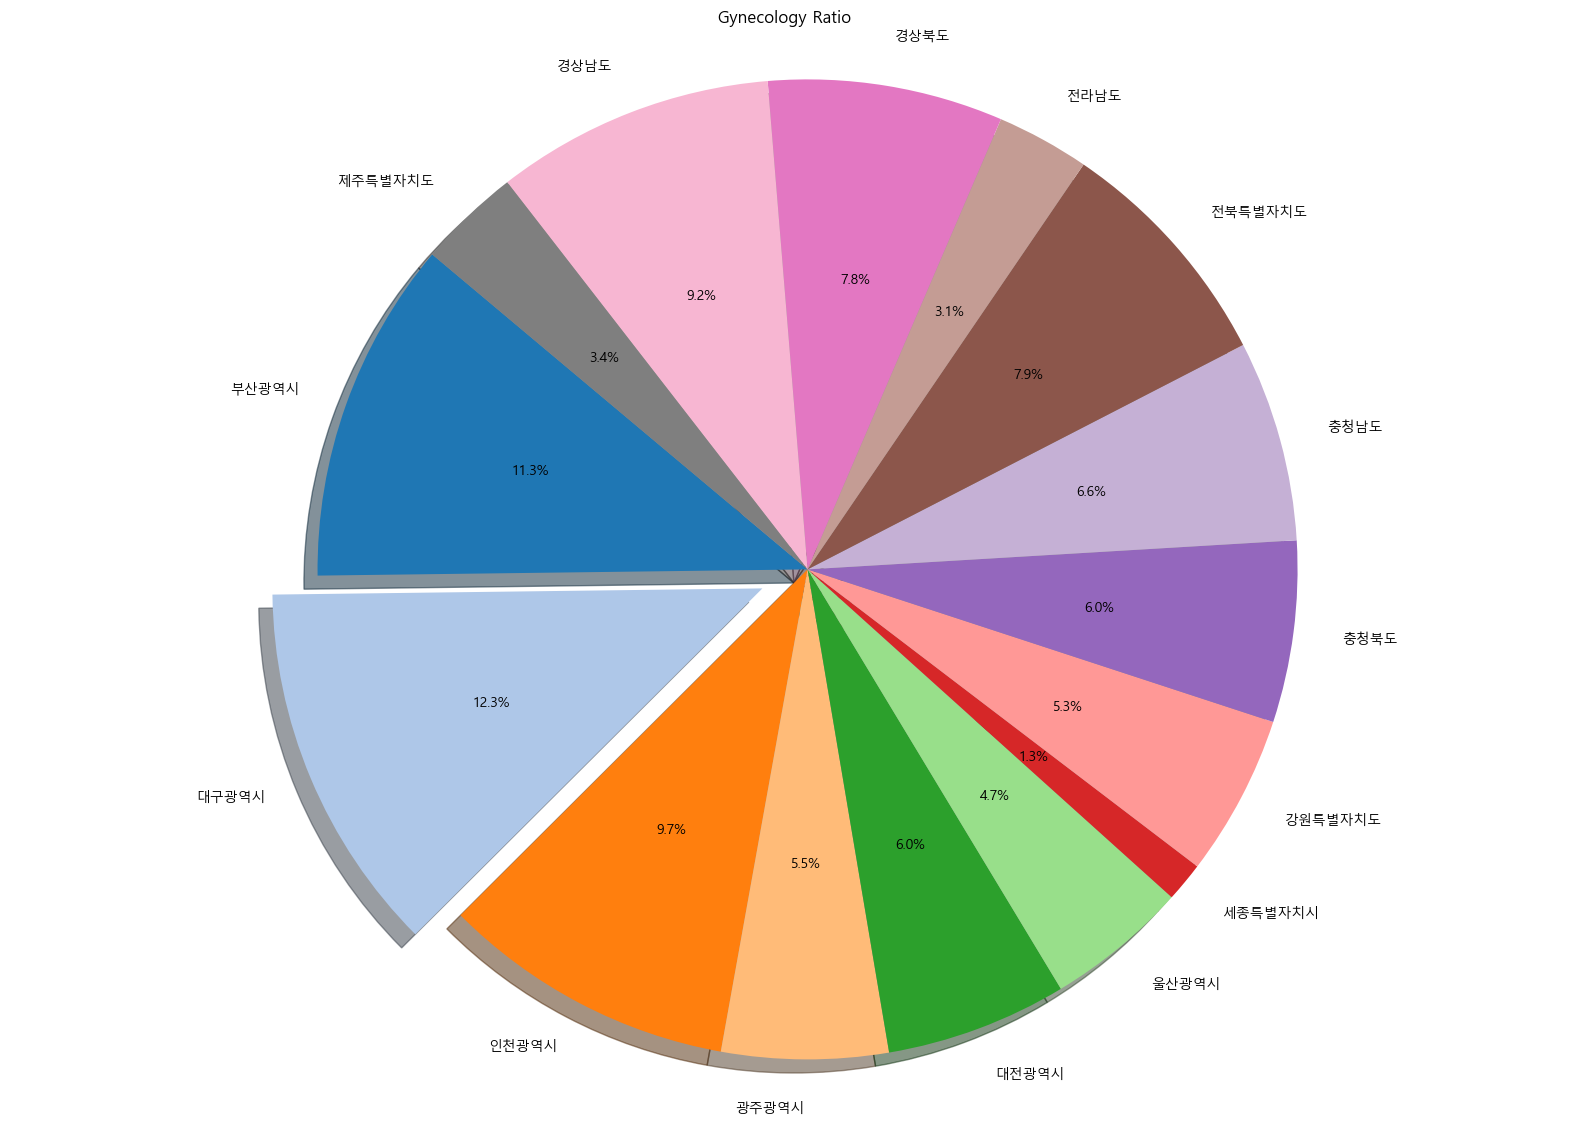

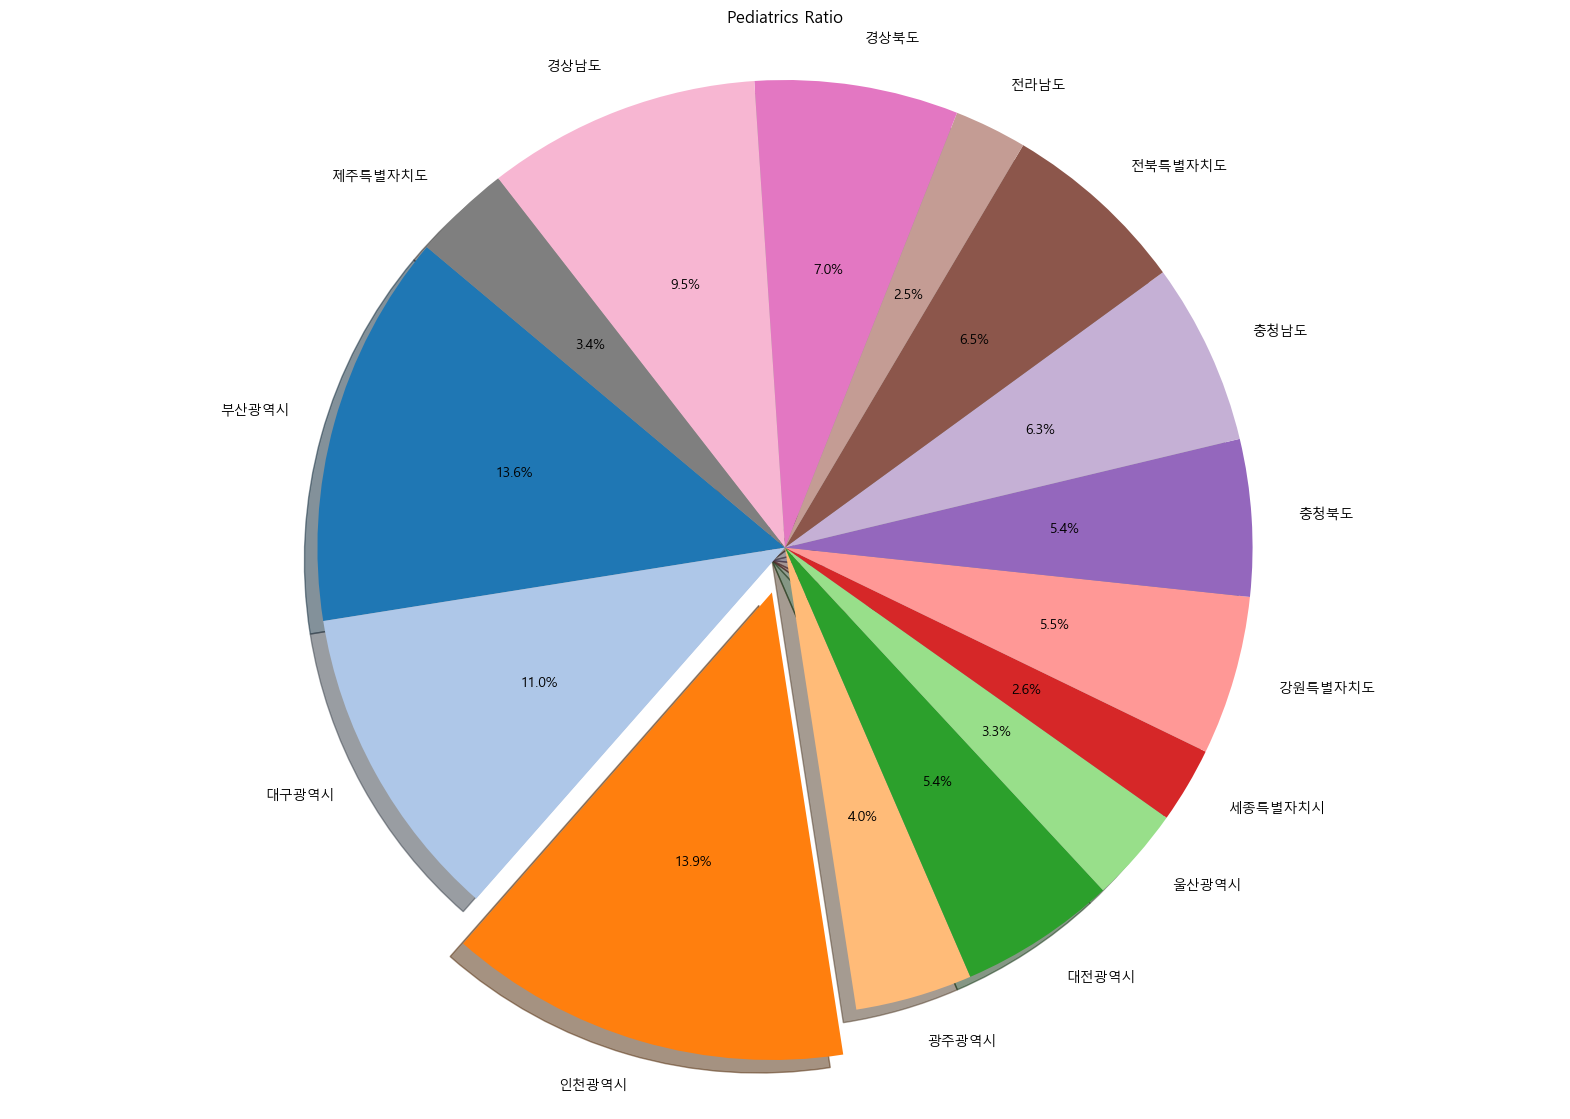

In [41]:
## 서울/경기가 압도적이기 때문에 서울/경기 제외한 시각화
case_filtered = case[~case['시도'].isin(['서울특별시', '경기도'])]


# 파이차트 함수 정의
def plot_pie_chart(column, title):
    labels = case_filtered['시도']
    sizes = case_filtered[column]
    colors = plt.cm.tab20(range(len(labels))) 
    explode = [0.1 if size == max(sizes) else 0 for size in sizes]  # 최대값 강조

    plt.figure(figsize=(20,14))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(title)
    plt.show()

ratios = ['ort_ratio', 'pla_ratio', 'men_ratio', 'gyn_ratio', 'ped_ratio']
titles = ['Orthopedics Ratio', 'Plastic Surgery Ratio', 'Mental Health Ratio', 'Gynecology Ratio', 'Pediatrics Ratio']

for ratio, title in zip(ratios, titles):
    plot_pie_chart(ratio, title)